<a href="https://colab.research.google.com/github/jameslee98331/METIIB-CUH-LP/blob/master/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip uninstall tensorflow -y
!pip install  tensorflow==1.14

Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 109.2MB 39kB/s 
     |████████████████████████████████| 491kB 51.2MB/s 
     |████████████████████████████████| 3.2MB 65.7MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1


In [0]:
import os
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GlobalAveragePooling2D
import numpy as np

drive.mount('/content/gdrive')


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
print(tf.__version__)

1.14.0


In [0]:
data_dir = '/content/gdrive/My Drive/MET IIB 2019-2020/PROJECTS/LONG PROJECT/5. Image Classifier/Images/data'
train_dir = os.path.join(data_dir, 'train')
train_top = os.path.join(train_dir, 'top')
# train_edge = os.path.join(train_dir, 'edge')
train_bottom = os.path.join(train_dir, 'bottom')
val_dir = os.path.join(data_dir, 'validation')
val_top = os.path.join(val_dir, 'top')
# val_edge = os.path.join(val_dir, 'edge')
val_bottom = os.path.join(val_dir, 'bottom')

num_train_top = len(os.listdir(train_top))
num_val_top = len(os.listdir(val_top))
num_train_bottom = len(os.listdir(train_bottom))
num_val_bottom = len(os.listdir(val_bottom))
# num_train_edge = len(os.listdir(train_edge))
# num_val_edge = len(os.listdir(val_edge))

total_train = num_train_top + num_train_bottom
total_val = num_val_top + num_val_bottom

BATCH_SIZE = 32
IMG_SIZE = 224

train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=20,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary'
    )

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=val_dir,
    shuffle=True,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary'
    )

base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
max_pooling_layer = tf.keras.layers.MaxPooling2D()
dropout_layer = tf.keras.layers.Dropout(0.1)
batch_norm_layer = tf.keras.layers.BatchNormalization()
prediction_layer = Dense(1)

model = Sequential([base_model,
                    global_average_layer,
                    prediction_layer])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Found 2261 images belonging to 2 classes.
Found 192 images belonging to 2 classes.
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_10  (None, 1280)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
EPOCHS = 24

history = model.fit_generator(train_data_gen,
                    epochs=EPOCHS,
                    validation_data=val_data_gen)

Epoch 1/24
71/71 [==============================] - 73s 1s/step - loss: 1.2526 - acc: 0.8364 - val_loss: 1.3688 - val_acc: 0.7188
Epoch 2/24
71/71 [==============================] - 61s 859ms/step - loss: 0.3181 - acc: 0.9421 - val_loss: 0.8559 - val_acc: 0.7708
Epoch 3/24
71/71 [==============================] - 65s 921ms/step - loss: 0.1068 - acc: 0.9743 - val_loss: 0.8588 - val_acc: 0.8229
Epoch 4/24
71/71 [==============================] - 65s 911ms/step - loss: 0.1249 - acc: 0.9828 - val_loss: 0.6493 - val_acc: 0.8229
Epoch 5/24
71/71 [==============================] - 65s 911ms/step - loss: 0.1115 - acc: 0.9819 - val_loss: 0.7456 - val_acc: 0.8229
Epoch 6/24
71/71 [==============================] - 65s 915ms/step - loss: 0.1091 - acc: 0.9845 - val_loss: 1.0891 - val_acc: 0.7917
Epoch 7/24
71/71 [==============================] - 65s 917ms/step - loss: 0.1825 - acc: 0.9708 - val_loss: 1.7209 - val_acc: 0.7604
Epoch 8/24
71/71 [==============================] - 65s 917ms/step - los

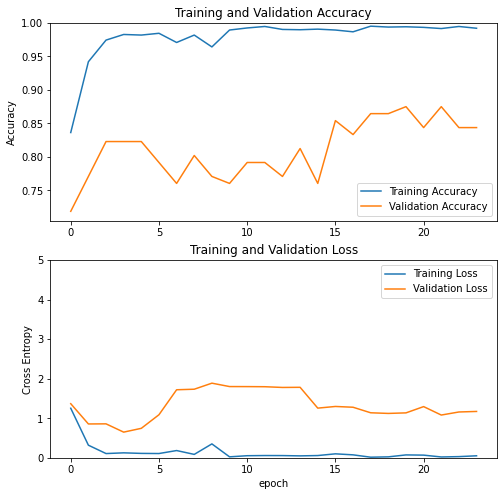

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
model.save('/content/gdrive/My Drive/MET IIB 2019-2020/PROJECTS/LONG PROJECT/5. Image Classifier/model_1.h5')

In [0]:
new_model = tf.keras.models.load_model('/content/gdrive/My Drive/MET IIB 2019-2020/PROJECTS/LONG PROJECT/5. Image Classifier/model_1.h5')

new_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_10  (None, 1280)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________
